## L1 Regularization: Lasso
Use Lasso to perform feature selection. Tthe regularization term is the L1 norm of the coefficients.

in this way becomes even more useful when you are dealing with data involving thousands of features.

(fit a lasso regression to the __Gapminder data__ and plot the coefficients). 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [67]:
# Read the CSV file into a DataFrame: df
boston = pd.read_csv('data\\boston.csv')

# Create arrays for features and target variable

# remove target from training set and convert to numpy array
X = boston.drop('MEDV', axis = 1)

# build target numpy array
y = boston['MEDV'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (506,)
Dimensions of X before reshaping: (506, 13)
Dimensions of y after reshaping: (506, 1)
Dimensions of X after reshaping: (506, 13)


### L1 Lasso $R^2$

Coefficient of determination (R^2) of the prediction.

The coefficient $R^2$ can be thought of as a percent. It gives you an idea of how many data points fall within the results of the line formed by the regression equation. The higher the coefficient, the higher percentage of points the line passes through when the data points and line are plotted. If the coefficient is 0.80, then 80% of the points should fall within the regression line. Values of 1 or 0 would indicate the regression line represents all or none of the data, respectively. A higher coefficient is an indicator of a better goodness of fit for the observations.

In [68]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print('Coefficiant (R^2) of the prediction: {}'.format(lasso.score(X_test, y_test)))

Coefficiant (R^2) of the prediction: 0.5950229535328551


### L1 Lasso Feature Selection

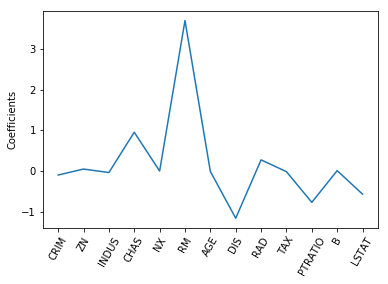

In [69]:
# from sklearn.linear_model import Lasso
names = boston.drop('MEDV', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')

[-0.          0.         -0.          0.         -0.          2.95469455
 -0.          0.         -0.         -0.         -0.24795837  0.
 -0.42817439]


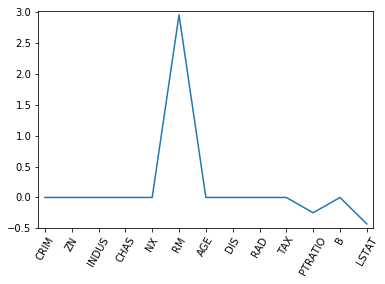

In [72]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.1, normalize = True)

# Fit the regressor to the data
# lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(X.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)

## L2 Regularization: Ridge
Lasso is great for feature selection, but when building regression models, Ridge regression should be the first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

Instead, take the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - this computes the L2 norm. 

### L2 Ridge $R^2$

Coefficient of determination (R^2) of the prediction.

The coefficient $R^2$ can be thought of as a percent. It gives you an idea of how many data points fall within the results of the line formed by the regression equation. The higher the coefficient, the higher percentage of points the line passes through when the data points and line are plotted. If the coefficient is 0.80, then 80% of the points should fall within the regression line. Values of 1 or 0 would indicate the regression line represents all or none of the data, respectively. A higher coefficient is an indicator of a better goodness of fit for the observations.

In [73]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print('Coefficient of determination (R^2) of the prediction: {}'.format(ridge.score(X_test, y_test)))

Coefficient of determination (R^2) of the prediction: 0.6996938275127311


## Visualize $\alpha$ vs. $R^2$
Fit ridge regression model over a range of different alphas and plot cross-validated R2 scores for each.  Plots the R2 score as well as standard error for each alpha:  Use the function below to observe how the R2 score varies with different alphas.  This illustrates importance of selecting the right value for alpha (hypertuning).

In [74]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('R^2 +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')

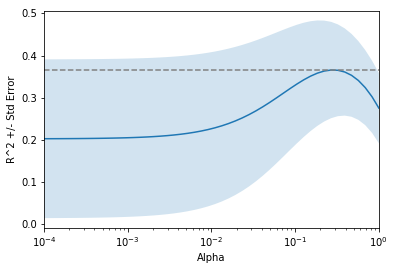

In [75]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
